# Bar Chart
---
Bar Chart atau yang dikenal dengan plot batang adalah grafik yang merepresentasikan data di mana panjang batang merepresentasikan besaran/ukuran fitur/variabel. Grafik batang biasanya mewakili variabel numerik dan kategorik yang dikelompokkan dalam interval. Dalam merepresentasikan suatu nilai, plot batang terdiri dari 2 tampilan:

- Vertical Bar Plot (`kind="bar"`)
- Horizontal Bar Plot (`kind="barh"`)

### Import Library & Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/SIB_HACKTIVE8/H8_3/PYTN_Assign_1_KS-010_ArifMunandar/london_crime_by_lsoa.csv')

---
**Question:** Berapa Jumlah kejahatan di London tahun 2008-2016?

Sebelumnya, dengan menggunakan Line Plot, kita dapat melihat bagaimana tren jumlah kejahatan di London dari tahun 2008-2016. Selanjutnya, dengan menggunakan Bar Chart kita juga dapat melihat jumlah kejahatan di London dari tahun 2008-2016 yang disajikan dengan plot batang sebagai berikut:

In [3]:
total_crime = df.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


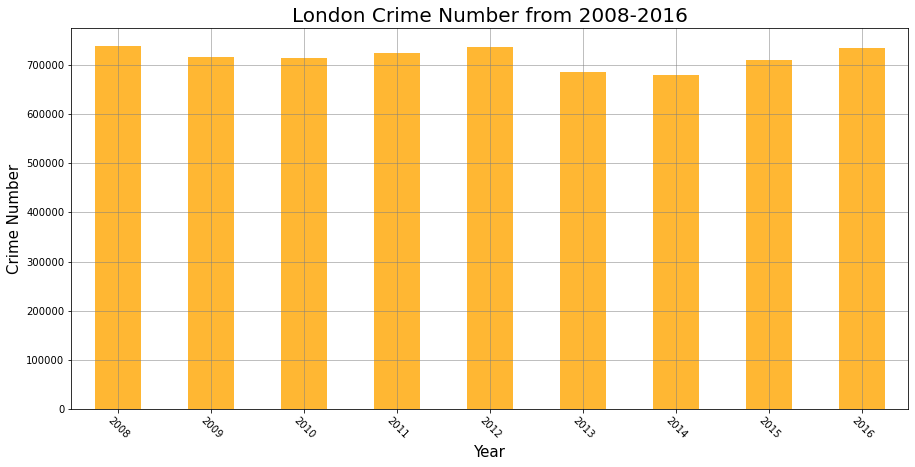

In [5]:
total_crime.plot(kind="bar",
                figsize=(15,7),
                color="orange",
                legend=False,
                alpha=0.8)
plt.title("London Crime Number from 2008-2016", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.xticks(rotation=-45)
plt.show()

Berdasarkan plot berikut, dapat diketahui bahwa jumlah kejahatan/kriminal di London tahun 2008-2012 adalah lebih dari 700000 dan kemudian turun di tahun 2013 dan 2014, diikuti kenaikan di atas 700000 kasus di tahun 2015 

---
**Question:** Berapa jumlah kejahatan di London berdasarkan kategori major tahun 2008-2016?

Sebelumnya, dengan menggunakan Area Plot, kita sudah mengetahui bahwa kategori Theft and Handling adalah kategori kejahatan/kriminal dengan jumlah kasus tertinggi di tahun 2008-2016. Selanjutnya, menggunakan Bar Chart ini dapat merepresentasikan jumlah kasus kejahatan/kriminal masing-masing kategori tahun 2008-2016.

In [6]:
totalCrimeMajorType = df.drop(["lsoa_code","borough","minor_category","year","month"], axis=1).groupby("major_category").sum()
totalCrimeMajorType["value"].to_numpy()
totalCrimeMajorType

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


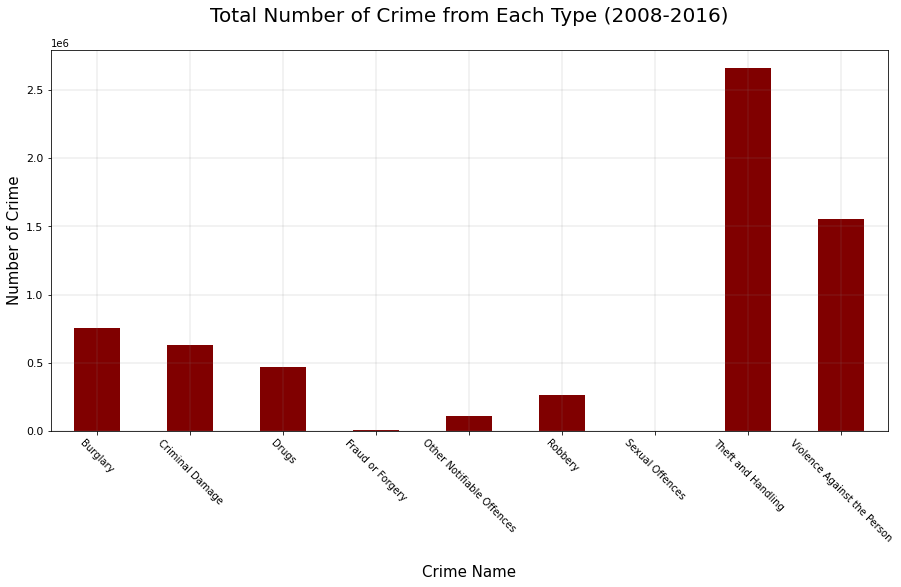

In [7]:
totalCrimeMajorType.plot(kind="bar",
                        figsize=(15,7),
                        legend=False,
                        color="maroon")
plt.title("Total Number of Crime from Each Type (2008-2016)\n", fontsize=20)
plt.xlabel("\nCrime Name", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(rotation=-45)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Berdasarkan visualisasi dengan plot batang, dapat diketahui bahwa Theft and Handling adalah kategori kejahatan/kriminal yang mempunyai jumlah kasus paling tinggi tahun 2008-2016 diikuti dengan Violance Against the Person. Selain itu, Fraud or Forgery dan Sexual Offences adalah kategori kejahatan/kriminal yang memiliki jumlah kasus terendah.

---
**Question:** Berapa jumlah kejahatan di masing-masing wilayah metropolitan London tahun 2008-2016?

In [12]:
totalCrimeBorough = df.drop(
    ["lsoa_code", "major_category", "minor_category", "year", "month"], axis=1).groupby("borough").sum()
totalCrimeBorough["value"].to_numpy()
totalCrimeBorough = totalCrimeBorough.sort_values(by="value", ascending=True)
totalCrimeBorough

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848
Havering,138947
Barking and Dagenham,149447


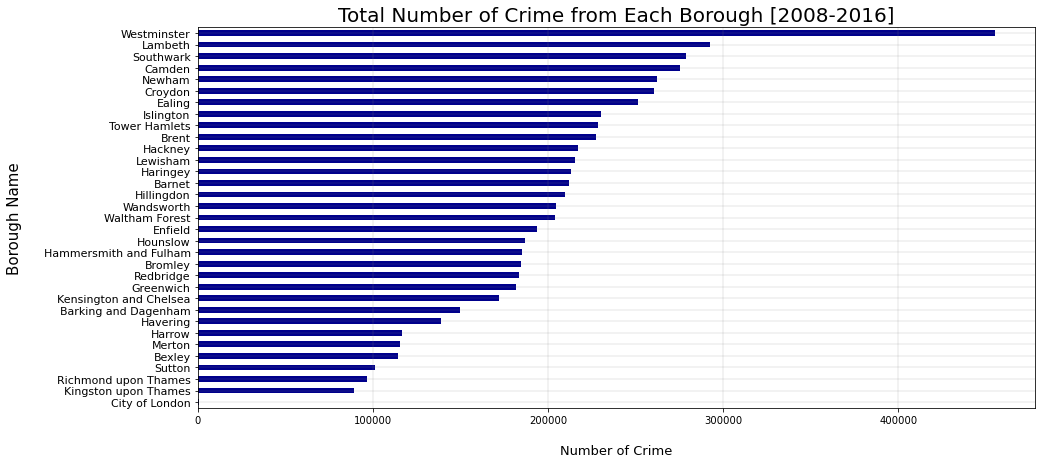

In [13]:
totalCrimeBorough.plot(kind="barh",
                           figsize=(15,7),
                           legend=False,
                           color="darkblue")
plt.title("Total Number of Crime from Each Borough [2008-2016]", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=13)
plt.ylabel("Borough Name\n", fontsize=15)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Dengan representasi jumlah kasus kejahatan di masing-masing wilayah metropolitan di London tahun 2008-2016 menggunakan plot batang, kita juga dapat menyimpulkan bahwa Westminster adalah wilayah yang memiliki jumlah kasus tertinggi selama tahun 2008-2016 dengan jumlah yang sangat signifikan apabila dibandingkan dengan wilayah lain.

---
**Question:** Berapa jumlah kejahatan di London berdasarkan kategori minor tahun 2008-2016?

In [14]:
minor_incidents = df.drop(["lsoa_code","borough","year","month"],axis=1)
minorIncidents = pd.pivot_table(minor_incidents, index=["major_category","minor_category"], values="value", aggfunc=np.sum)
minorIncidents

value
major_category              minor_category                                
Burglary                    Burglary in Other Buildings             263011
                            Burglary in a Dwelling                  491282
Criminal Damage             Criminal Damage To Dwelling             154116
                            Criminal Damage To Motor Vehicle        265463
                            Criminal Damage To Other Building        66003
                            Other Criminal Damage                   145356
Drugs                       Drug Trafficking                         35819
                            Other Drugs                               2998
                            Possession Of Drugs                     431948
Fraud or Forgery            Counted per Victim                        3840
                            Other Fraud & Forgery                     1485
Other Notifiable Offences   Going Equipped                            5530
                            Other Notifiable                        100819
Robbery                     Business Property                        21295
                            Personal Property                       237578
Sexual Offences             Other Sexual                              1005
                            Rape                                       268
Theft and Handling          Handling Stolen Goods                    16100
                            Motor Vehicle Interference & Tampering   56224
                            Other Theft                             980085
                            Other Theft Person                      308842
                            Theft From Motor Vehicle                569956
                            Theft From Shops                        345142
                            Theft/Taking Of Motor Vehicle           216538
                            Theft/Taking of Pedal Cycle             168974
Violence Against the Person Assault with Injury                     451001
                            Common Assault                          413690
                            Harassment                              458124
                            Murder                                     949
                            Offensive Weapon                         37983
                            Other violence                           70778
                            Wounding/GBH                            125556

Di atas adalah tabel yang menyajikan jumlah kasus kejahatan/kriminal masing-masing kategori tahun 2008-2016, misal kita ingin melihat bar chart dari kategori `Theft and Handling`

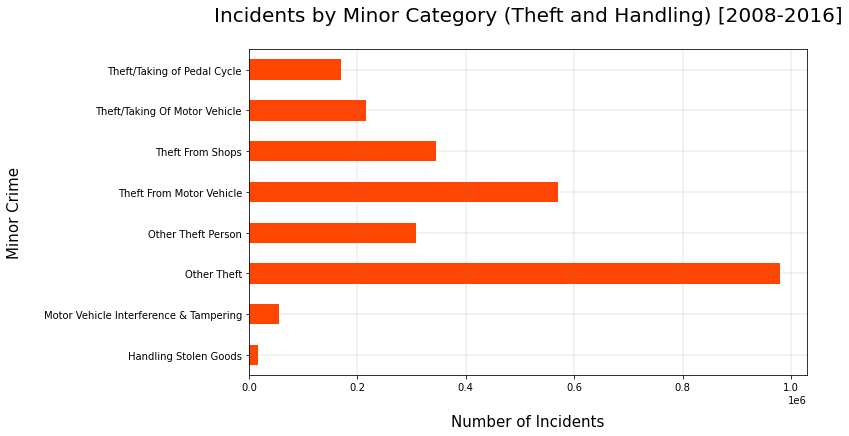

In [15]:
theft_crime = minorIncidents.loc["Theft and Handling"]
theft_crime.plot(kind="barh",
                    figsize=(10,6),
                    legend=False,
                    color="orangered")
plt.title("Incidents by Minor Category (Theft and Handling) [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Incidents", fontsize=15)
plt.ylabel("Minor Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Berdasarkan visualisasi bar chart diatas, kita dapat melihat lebih spesifik bahwa kategori kasus pencurian yang memiliki jumlah kasus tertinggi adalah `Theft From Motor Vehicle`(pencurian kendaraan) dan `Theft From Shops` (pencurian di toko).

Berikut adalah plot batang masing-masing kategori:

In [16]:
df["major_category"].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [17]:
burglary_crime = minorIncidents.loc["Burglary"]
violance_crime = minorIncidents.loc["Violence Against the Person"]
robbery_crime = minorIncidents.loc["Robbery"]
theft_crime = minorIncidents.loc["Theft and Handling"]
criminal_crime = minorIncidents.loc["Criminal Damage"]
drugs_crime = minorIncidents.loc["Drugs"]
fraud_crime = minorIncidents.loc["Fraud or Forgery"]
other_crime = minorIncidents.loc["Other Notifiable Offences"]
sexual_crime = minorIncidents.loc["Sexual Offences"]

Text(0, 0.5, 'Minor Category')

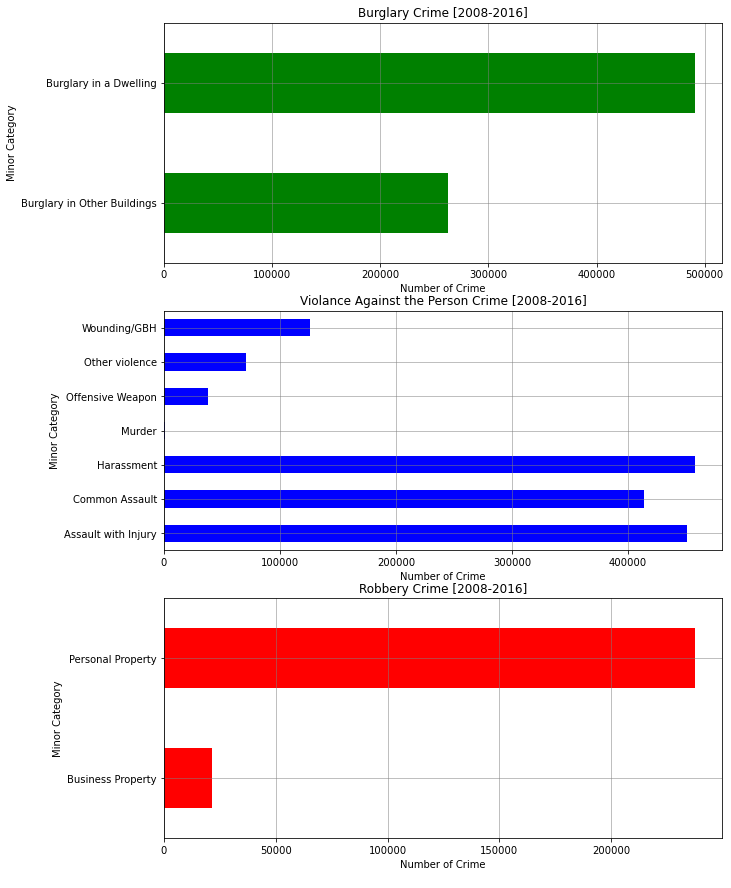

In [18]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax0 = fig.add_subplot(3,1,1) #1
ax1 = fig.add_subplot(3,1,2) #2
ax2 = fig.add_subplot(3,1,3) #3

burglary_crime.plot(kind="barh", legend=False, ax=ax0, color="green")
ax0.set_title("Burglary Crime [2008-2016]")
ax0.grid(color="grey", linewidth=0.5)
ax0.set_xlabel("Number of Crime\n")
ax0.set_ylabel("Minor Category")

violance_crime.plot(kind="barh", legend=False, ax=ax1, color="blue")
ax1.set_title("Violance Against the Person Crime [2008-2016]")
ax1.grid(color="grey", linewidth=0.5)
ax1.set_xlabel("Number of Crime\n")
ax1.set_ylabel("Minor Category")

robbery_crime.plot(kind="barh", legend=False, ax=ax2, color="red")
ax2.set_title("Robbery Crime [2008-2016]")
ax2.grid(color="grey", linewidth=0.5)
ax2.set_xlabel("Number of Crime\n")
ax2.set_ylabel("Minor Category")

Text(0, 0.5, 'Minor Category')

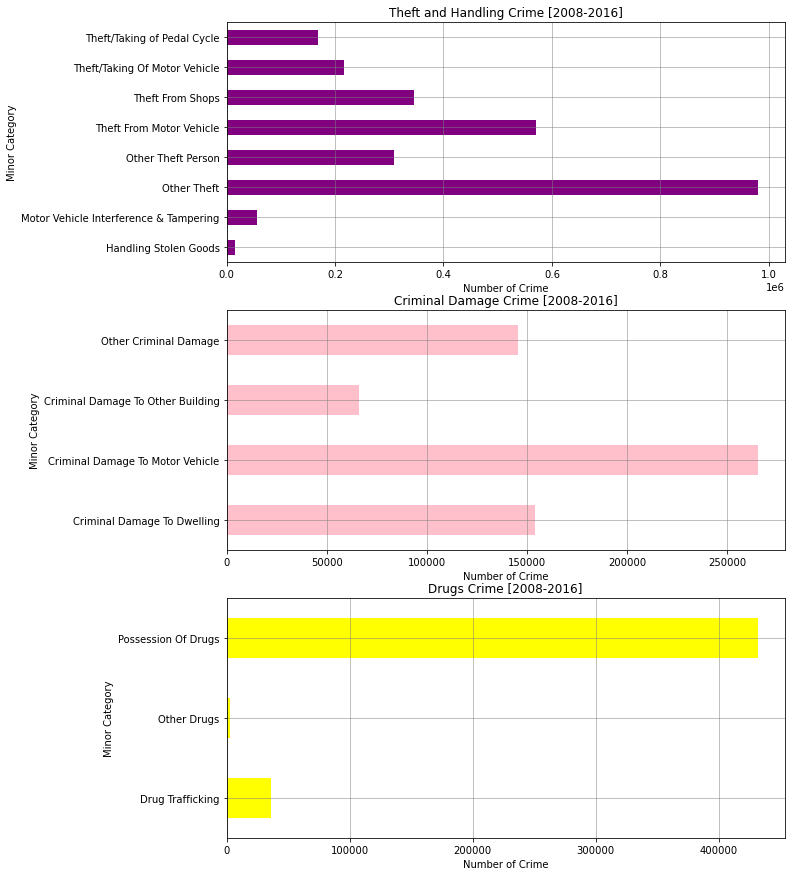

In [19]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax3 = fig.add_subplot(3,1,1) #1
ax4 = fig.add_subplot(3,1,2) #2
ax5 = fig.add_subplot(3,1,3) #3

theft_crime.plot(kind="barh", legend=False, ax=ax3, color="purple")
ax3.set_title("Theft and Handling Crime [2008-2016]")
ax3.grid(color="grey", linewidth=0.5)
ax3.set_xlabel("Number of Crime")
ax3.set_ylabel("Minor Category")

criminal_crime.plot(kind="barh", legend=False, ax=ax4, color="pink")
ax4.set_title("Criminal Damage Crime [2008-2016]")
ax4.grid(color="grey", linewidth=0.5)
ax4.set_xlabel("Number of Crime")
ax4.set_ylabel("Minor Category")

drugs_crime.plot(kind="barh", legend=False, ax=ax5, color="yellow")
ax5.set_title("Drugs Crime [2008-2016]")
ax5.grid(color="grey", linewidth=0.5)
ax5.set_xlabel("Number of Crime")
ax5.set_ylabel("Minor Category")

Text(0, 0.5, 'Minor Category')

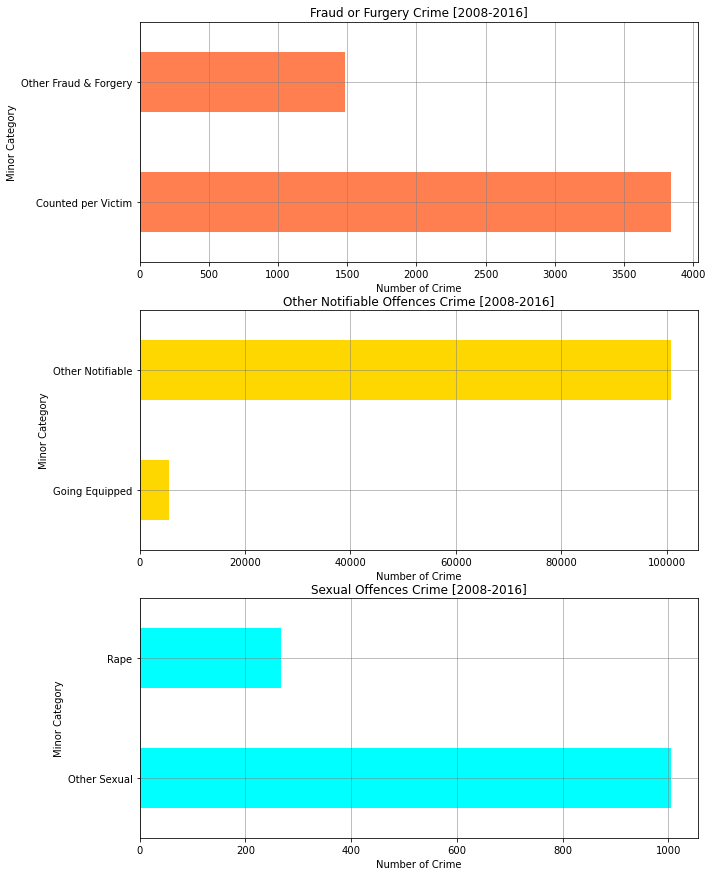

In [20]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax6 = fig.add_subplot(3,1,1) #1
ax7 = fig.add_subplot(3,1,2) #2
ax8 = fig.add_subplot(3,1,3) #3

fraud_crime.plot(kind="barh", legend=False, ax=ax6, color="coral")
ax6.set_title("Fraud or Furgery Crime [2008-2016]")
ax6.grid(color="grey", linewidth=0.5)
ax6.set_xlabel("Number of Crime")
ax6.set_ylabel("Minor Category")

other_crime.plot(kind="barh", legend=False, ax=ax7, color="gold")
ax7.set_title("Other Notifiable Offences Crime [2008-2016]")
ax7.grid(color="grey", linewidth=0.5)
ax7.set_xlabel("Number of Crime")
ax7.set_ylabel("Minor Category")

sexual_crime.plot(kind="barh", legend=False, ax=ax8, color="aqua")
ax8.set_title("Sexual Offences Crime [2008-2016]")
ax8.grid(color="grey", linewidth=0.5)
ax8.set_xlabel("Number of Crime")
ax8.set_ylabel("Minor Category")

Berdasarkan plot batang di atas, kita dapat melihat masing-masing jumlah kasus kejahatan/kriminal kategori mayor di London berdasarkan kategori minornya. Dapat diketahui bahwa kejahatan kategori `Burglary` yang paling dominan adalah Burglary in Dwelling, untuk kategori `Robbery` yang paling dominan adalah Personal Property, dan seterusnya.

---

### Kesimpulan
---
Dengan menggunakan Bar Chart cukup banyak informasi yang lebih spesifik yang dapat kita ambil karena Bar Chart merepresentasikan besaran/ukuran, baik itu numerik maupun kategorik.